In [53]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data_cleaned.csv")

In [3]:
data.head()

,Unnamed: 0,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,...,Casualty Severity,Sex of Casualty,Age of Casualty,Gender,Year,Month,Day,TypeRoad,Hour,Minute
0,0,3AP0313,426340,428455,1,17/03/2017,815,A643,Dry,Daylight: Street lights present,...,Serious,Female,61,2,2017,3,17,A,8,15
1,1,3BE0850,430828,433222,2,14/01/2017,1330,A61,Dry,Daylight: Street lights present,...,Slight,Male,36,1,2017,1,14,A,13,30
2,2,4110858,428940,429856,2,01/01/2017,805,A653,Wet/Damp,Daylight: Street lights present,...,Slight,Male,32,1,2017,1,1,A,8,5
3,3,4110858,428940,429856,2,01/01/2017,805,A653,Wet/Damp,Daylight: Street lights present,...,Slight,Male,30,1,2017,1,1,A,8,5
4,4,4111495,429899,434277,2,01/01/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,...,Slight,Female,26,2,2017,1,1,Unclassified,17,5


In [4]:
data.dtypes

Unnamed: 0              int64
Reference Number       object
Grid Ref: Easting       int64
Grid Ref: Northing      int64
Number of Vehicles      int64
Accident Date          object
Time (24hr)             int64
1st Road Class & No    object
Road Surface           object
Lighting Conditions    object
Weather Conditions     object
Type of Vehicle        object
Casualty Class         object
Casualty Severity      object
Sex of Casualty        object
Age of Casualty         int64
Gender                  int64
Year                    int64
Month                   int64
Day                     int64
TypeRoad               object
Hour                    int64
Minute                  int64
dtype: object

## Biểu đồ thống kê số vụ tai nạn theo các tháng

In [5]:
# biểu đồ đường

In [6]:
list_Month =  data['Month'].value_counts()

In [7]:
pd_month = pd.DataFrame()
list_index = []
list_values = []
for i in range(1, 13):
    list_index.append(i)
    list_values.append(list_Month[i])
pd_month['month'] = list_index
pd_month['values'] = list_values


([<matplotlib.axis.XTick at 0x1a86f8faf28>,
 <a list of 12 Text xticklabel objects>)

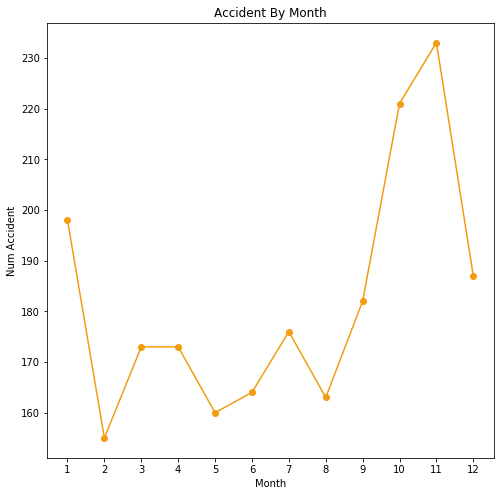

In [8]:
xticks = pd_month['month']
plt.figure(figsize=(8,8))
plt.plot(pd_month['month'], pd_month['values'], color='#f39c12', marker='o', linestyle='solid')
plt.title("Accident By Month")
plt.xlabel("Month")
plt.ylabel("Num Accident")
plt.xticks(xticks)


## Biểu đồ thống kê phần trăm về giới tính nạn nhân

In [9]:
# biểu đồ pie

In [10]:
list_gender =  data['Sex of Casualty'].value_counts()
list_gender

Male      1244
Female     941
Name: Sex of Casualty, dtype: int64

In [11]:
per_male = list_gender[0] / (list_gender[1] + list_gender[0])
per_female = 1 - per_male

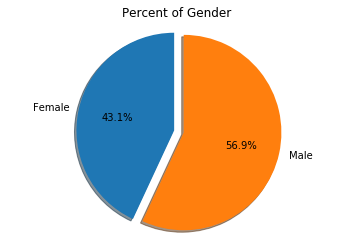

<Figure size 576x576 with 0 Axes>

In [12]:
labels = 'Female', 'Male'
sizes = [per_female, per_male ]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Percent of Gender ")
plt.figure(figsize=(8,8))

plt.show()

## Biểu đồ thống kê số vụ tai nạn theo độ tuổi

In [13]:
# biểu đồ bar chart

In [14]:
# data['Age of Casualty'].unique()

In [15]:
import seaborn as sns

C:\Users\TranTung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


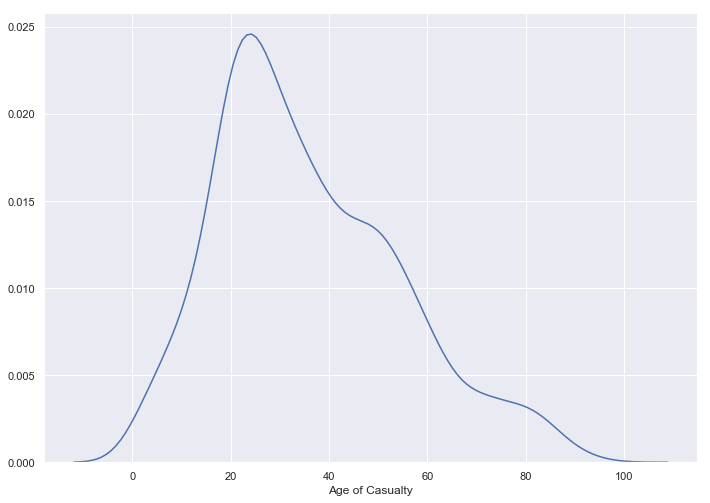

In [16]:
sns.set(color_codes=True, rc={'figure.figsize':(11.7,8.27)})

x = data['Age of Casualty']
sns.distplot(x, hist=False);

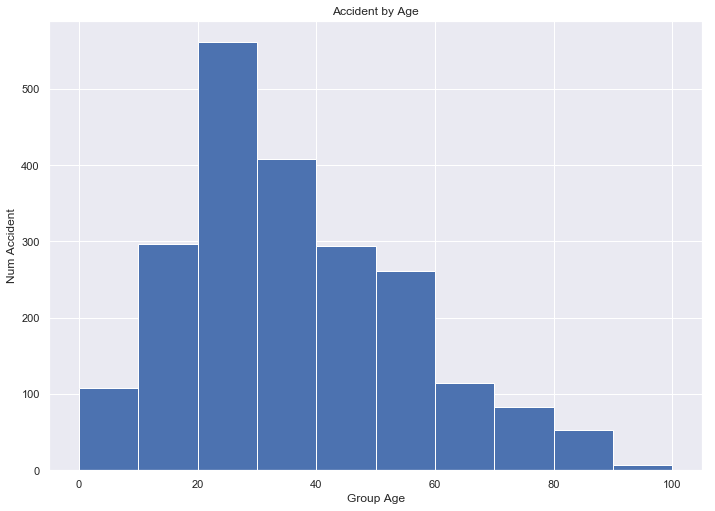

<Figure size 72x72 with 0 Axes>

In [17]:
a = data['Age of Casualty']
plt.hist(a, bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title("Accident by Age") 
plt.xlabel("Group Age")
plt.ylabel("Num Accident")
plt.figure(figsize=(1,1))
plt.show()

## Biểu đồ thống kê số vụ tai nạn trên từng loại đường

In [18]:
# biểu đồ bar chart

In [19]:
pandas_type = data.groupby(['TypeRoad']).size().reset_index(name='counts')

Text(0, 0.5, 'Num Accident')

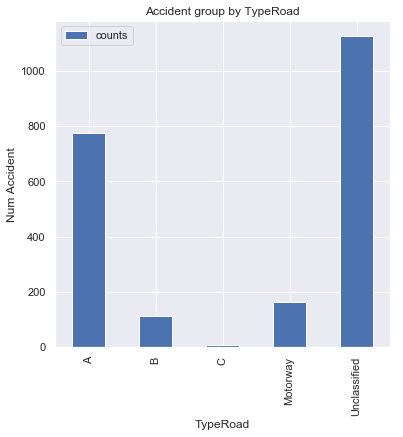

In [20]:
chart = pandas_type.plot(kind='bar', x ='TypeRoad' \
                         , figsize=(6,6), title= "Accident group by TypeRoad")
chart.set_xlabel("TypeRoad")
chart.set_ylabel("Num Accident")

## Biểu đồ thống kê số lương vụ tai nạn theo giờ

In [21]:
pandas_hour = data.groupby(['Hour']).size().reset_index(name='count')

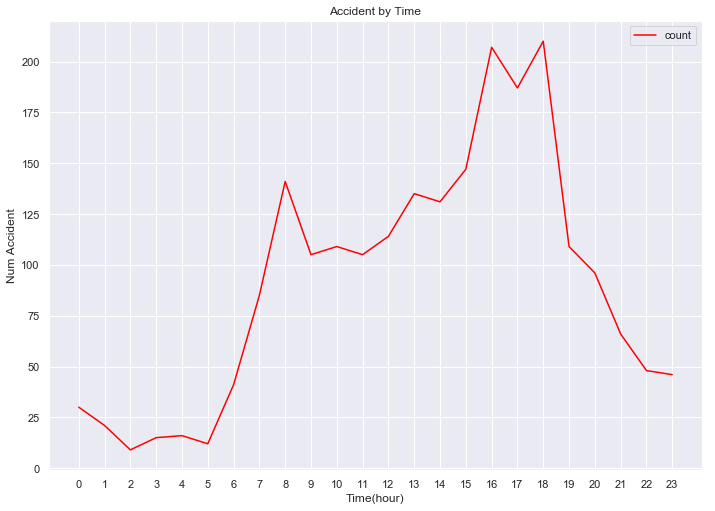

In [27]:
ax = plt.gca()
# plt.figure(figsize=(8,8))


pandas_hour.plot(kind='line',x='Hour',y='count', color='red', ax=ax) 

plt.title("Accident by Time")
plt.xlabel("Time(hour)")
plt.ylabel("Num Accident")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
# plt.figure(figsize=(8,8))
plt.show()

## Biểu đồ thống kê số vụ tai nạn theo Road Surface

In [23]:
pandas_Surface = data.groupby(['Road Surface']).size().reset_index(name='count')

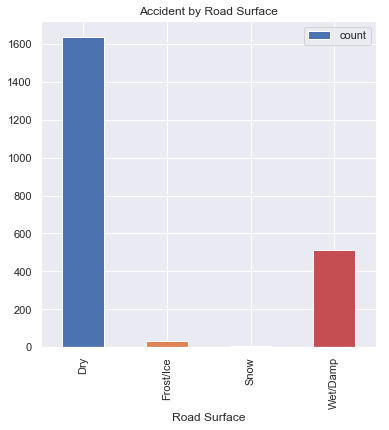

In [36]:
ax = pandas_Surface.plot.bar(x='Road Surface', y='count', title="Accident by Road Surface", figsize=(6,6))
# ax.set_xlables("Road Surface")
# ax.set_ylables("Num Accident")

## Biểu đồ thống kê số vụ tai nạn theo Lighting Conditions

In [25]:
pandas_Light = data.groupby(['Lighting Conditions']).size().reset_index(name='count')

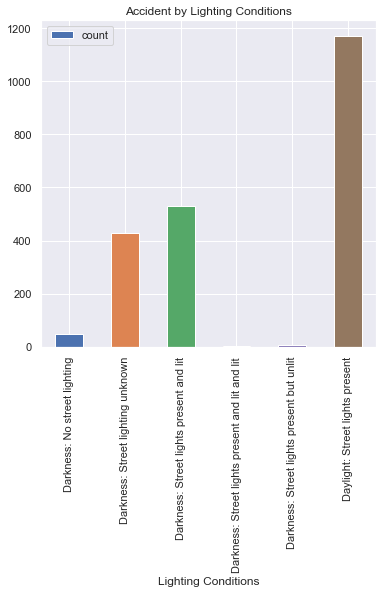

In [39]:
bx = pandas_Light.plot.bar(x='Lighting Conditions', y='count',title="Accident by Lighting Conditions", figsize=(6,6))

## Biểu đồ phần trăm loại thương vong

In [40]:
pandas_Casualty = data.groupby(['Casualty Severity']).size().reset_index(name='count')

In [43]:
sum = pandas_Casualty['count'].sum()

In [44]:
pandas_Casualty['percent'] = pandas_Casualty['count']/sum

In [50]:
# pandas_Casualty

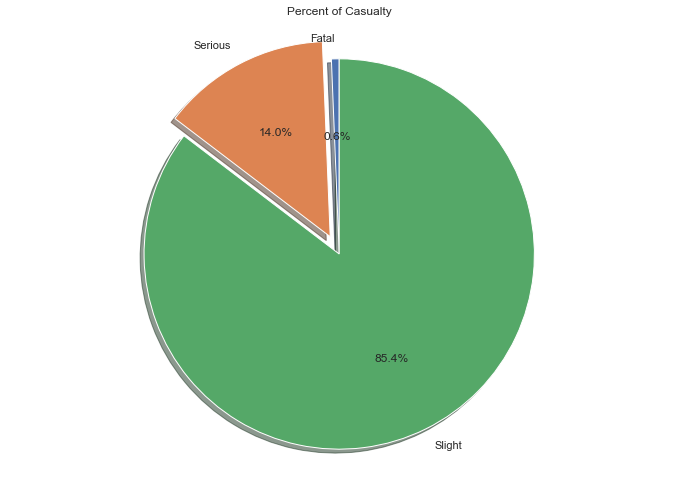

<Figure size 576x576 with 0 Axes>

In [52]:
labels = pandas_Casualty['Casualty Severity']
sizes = pandas_Casualty['percent']
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Percent of Casualty")
plt.figure(figsize=(8,8))

plt.show()